In [26]:
# import os
# #import spikeinterface.extractors as se
# import spikeinterface.preprocessing as sp
# from itertools import combinations
# import os
# import pandas as pd
# import spike.spike_analysis.firing_rate_calculations as fr
# import spike.spike_analysis.spike_collection as collection
# import spike.spike_analysis.spike_recording as recording
# import behavior.boris_extraction as boris
# from lfp.trodes import read_exported as tr
# import spike.spike_analysis.pca_trajectories as pca_trajectories
# import pickle
# import behavior.behavioral_epoch_tools as bet
# import ffmpeg
# import cv2
# from pathlib import Path
import pickle
import numpy as np
import behavior.behavioral_epoch_tools as bet
import matplotlib.pyplot as plt
from scipy import stats

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

In [27]:
behavior_dicts = unpickle_this(r'C:\Users\zhaoz\Desktop\Research\SocialMemory\only_subject\behavior_dicts.pkl')
print(behavior_dicts)
print(len(behavior_dicts))

{'23_CNF_merged.rec': {'cagemate': array([[ 614217.25,  616434.65],
       [ 620754.2 ,  622671.1 ],
       [ 650665.65,  652398.  ],
       [ 676581.4 ,  678798.8 ],
       [ 728759.4 ,  729660.2 ],
       [ 950429.25,  951191.45],
       [1091164.3 , 1091926.5 ],
       [1172306.95, 1173831.4 ],
       [1175217.25, 1175840.9 ],
       [1213675.15, 1215615.35],
       [1217278.4 , 1219773.  ],
       [1221574.6 , 1222406.15]]), 'familiar': array([[1819023.  , 1824012.1 ],
       [1828031.15, 1835029.75],
       [1837039.3 , 1838009.4 ],
       [1845008.05, 1846047.45],
       [1849027.05, 1855055.6 ],
       [1861014.85, 1863024.35],
       [1878061.  , 1879031.15],
       [1887069.15, 1890048.8 ],
       [1902036.55, 1905016.2 ],
       [1940009.4 , 1946037.9 ],
       [1953036.55, 1954006.65],
       [1957055.6 , 1958025.7 ],
       [1962044.7 , 1963014.85],
       [1971052.85, 1972023.  ],
       [1978051.5 , 1988999.9 ],
       [1996056.75, 1997037.9 ],
       [2060995.8 , 2067024

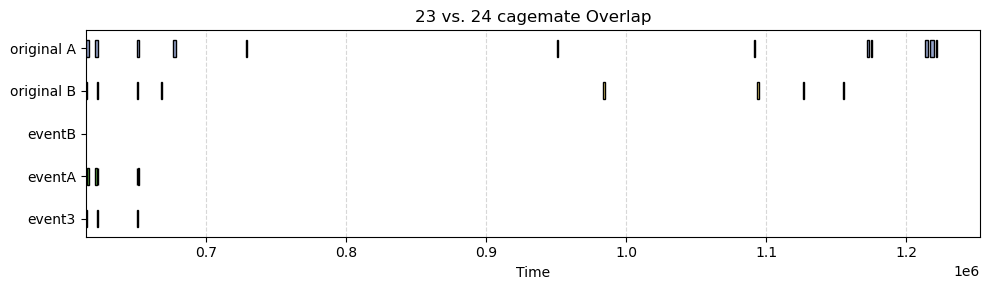

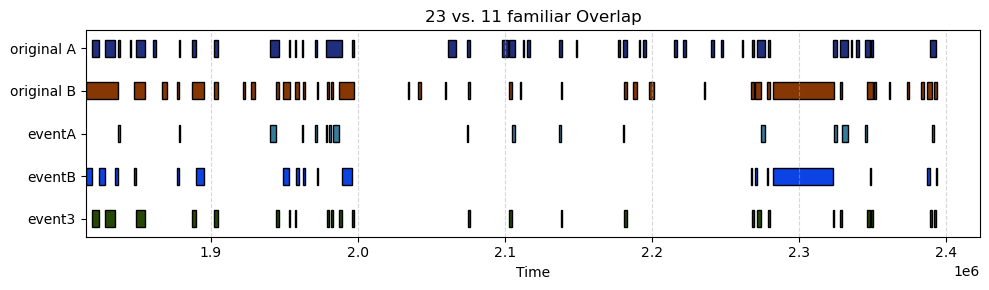

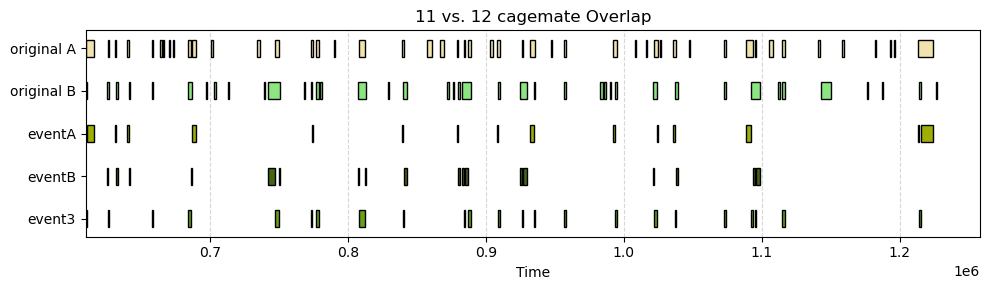

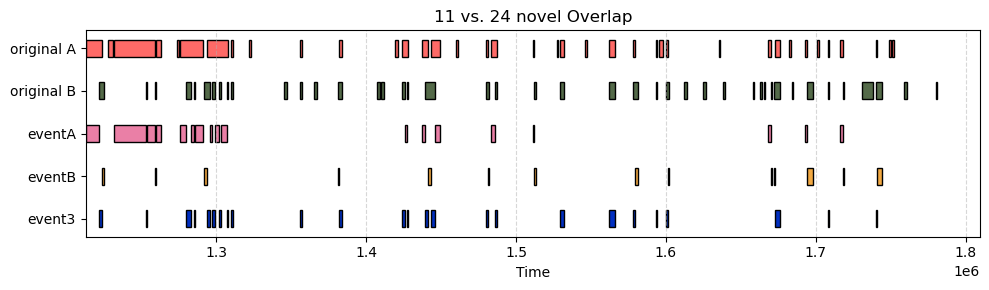

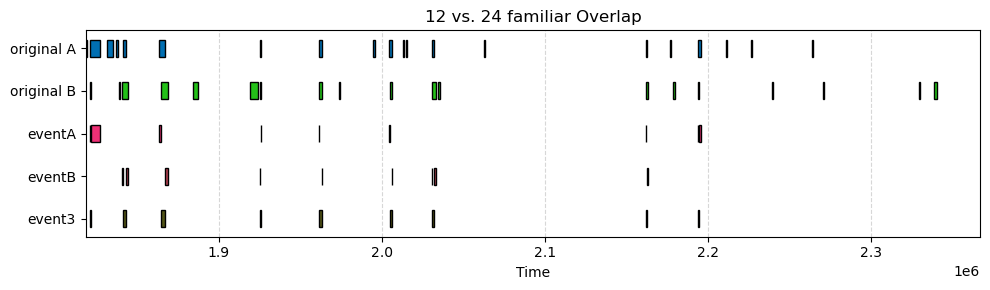

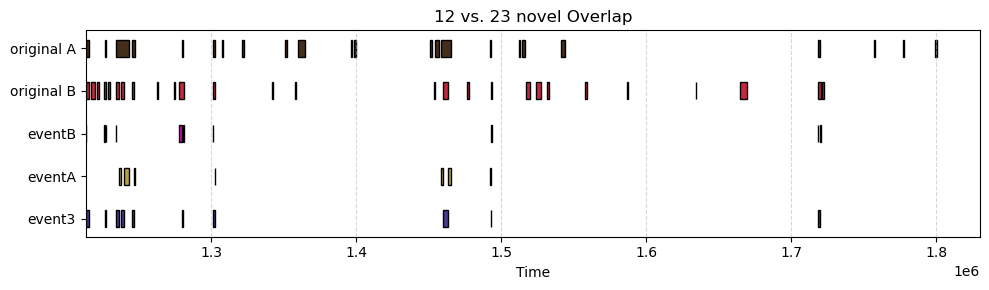

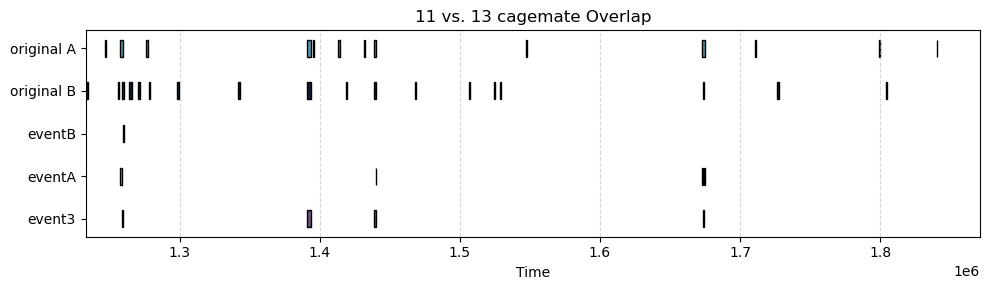

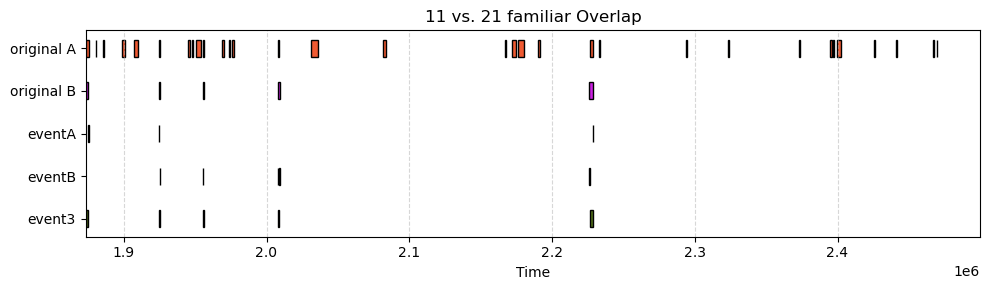

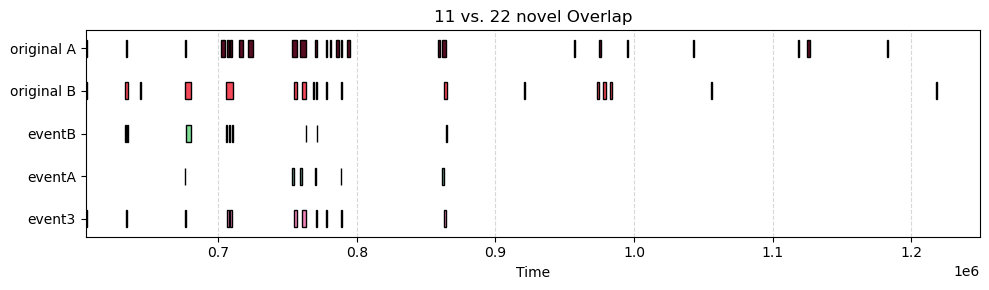

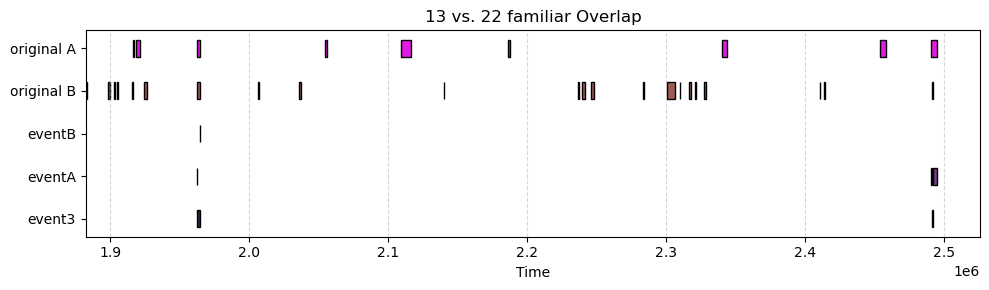

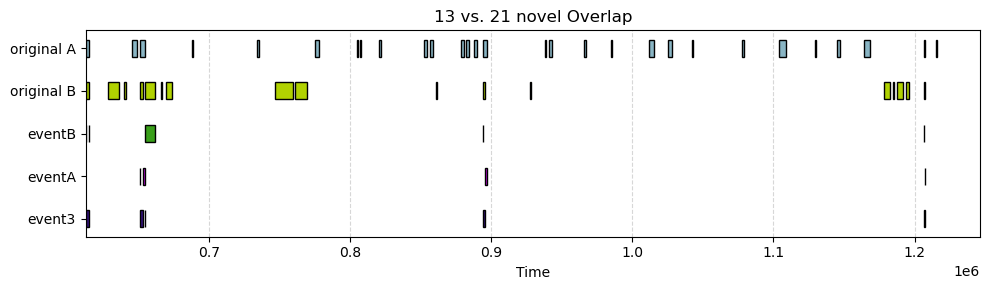

no overlap


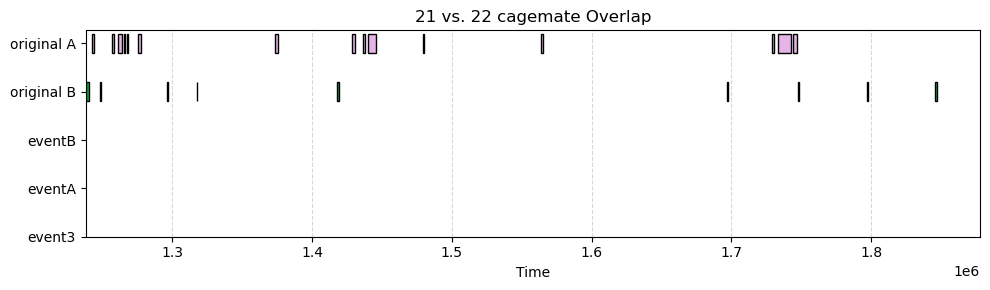

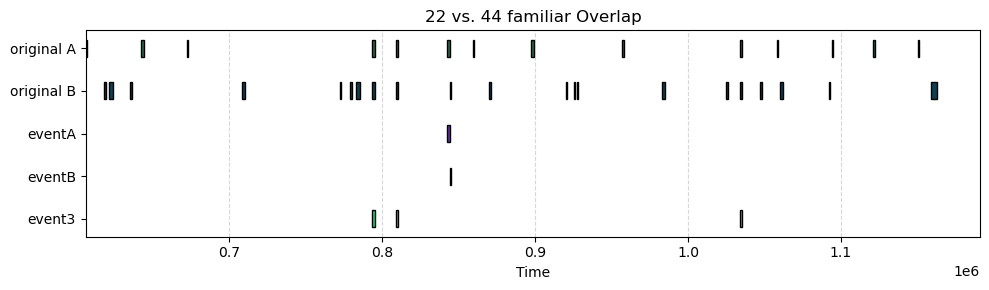

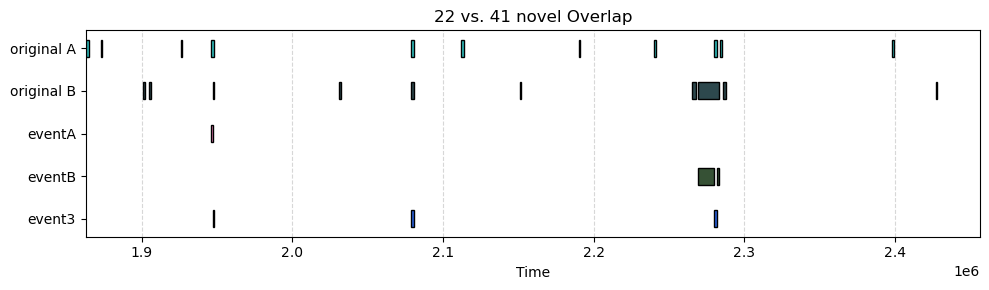

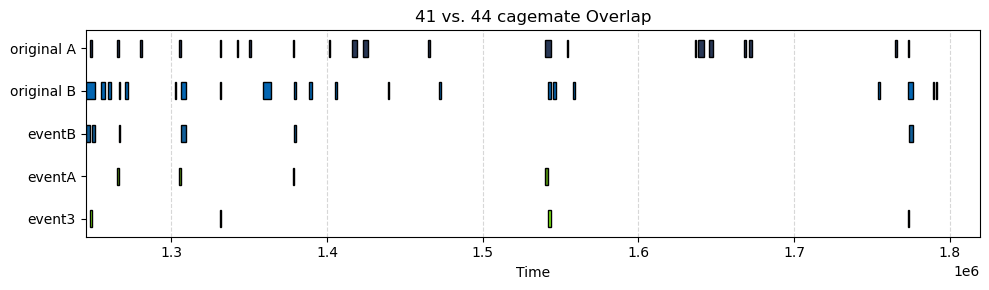

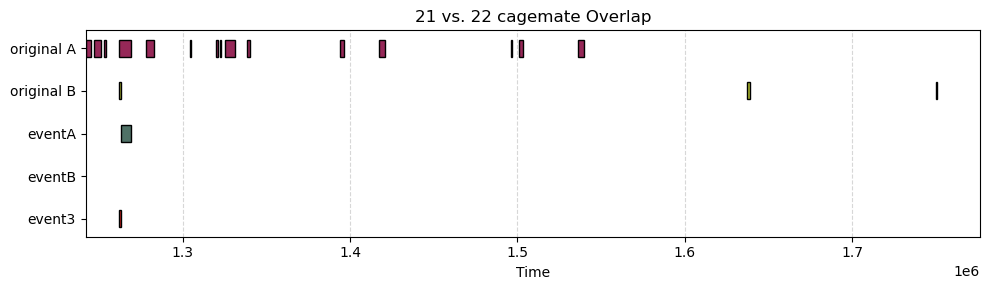

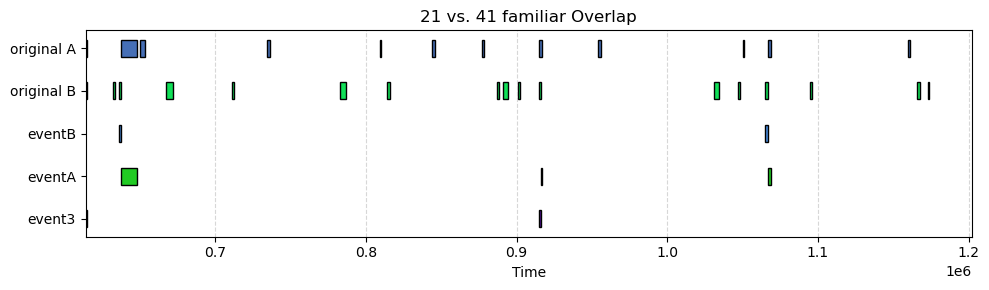

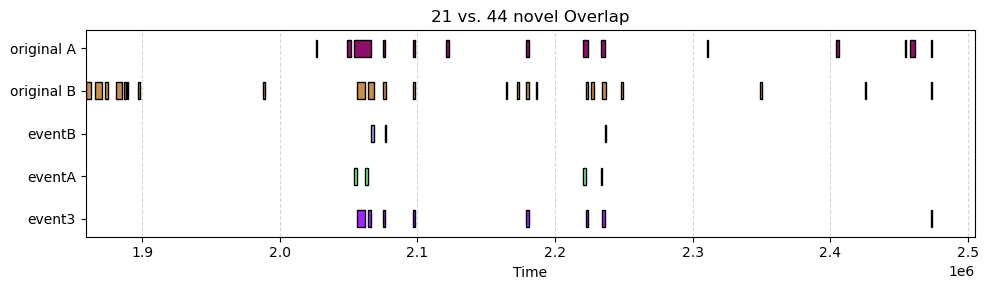

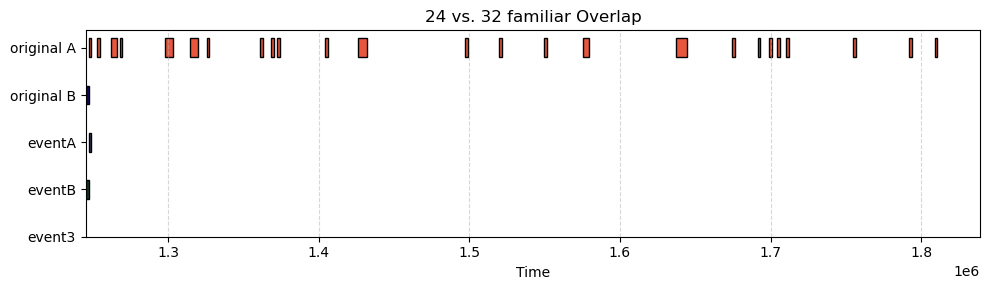

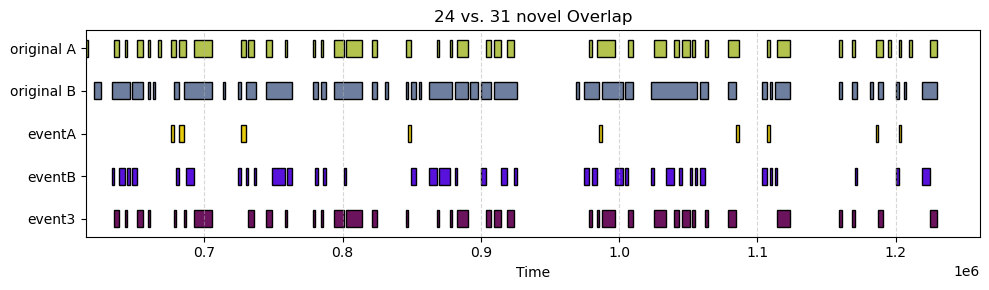

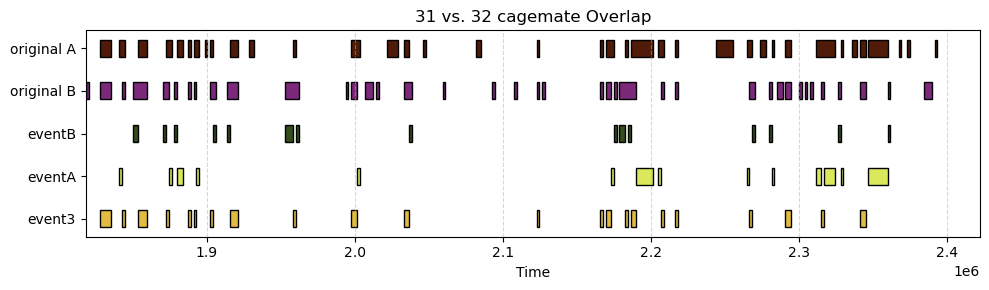

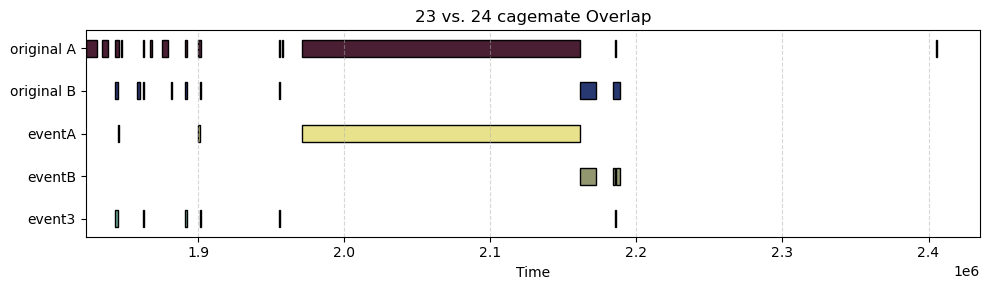

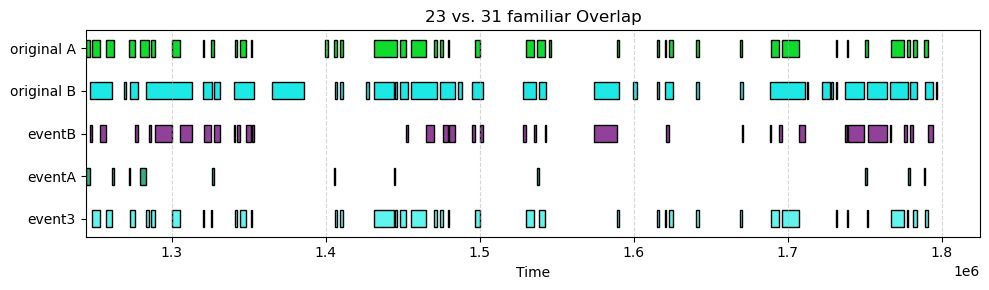

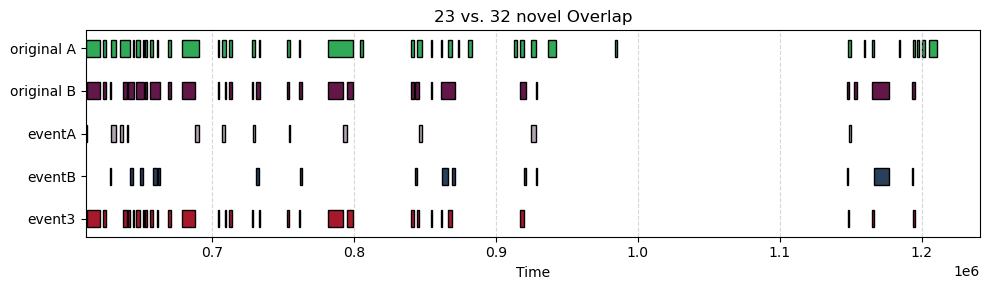

{'23_CNF_merged.rec': {'cagemate': {'subject only sniffing': array([[614217.25, 614355.85],
       [615187.4 , 616434.65],
       [620754.2 , 621839.55],
       [622634.05, 622671.1 ],
       [650665.65, 650804.25],
       [651358.6 , 652398.  ]]), 'agent only sniffing': array([], dtype=float64), 'reciprocal sniffing': array([[614355.85, 615187.4 ],
       [621839.55, 622634.05],
       [650804.25, 651358.6 ]])}, 'familiar': {'subject only sniffing': array([[1837039.3 , 1838009.4 ],
       [1878061.  , 1879031.15],
       [1940009.4 , 1944028.4 ],
       [1962044.7 , 1963014.85],
       [1971052.85, 1972023.  ],
       [1978051.5 , 1979021.6 ],
       [1980061.  , 1982001.25],
       [1983040.65, 1986990.35],
       [2074023.  , 2074993.1 ],
       [2104997.15, 2107006.65],
       [2137010.75, 2138050.15],
       [2180042.  , 2181012.1 ],
       [2274017.4 , 2277052.85],
       [2324033.85, 2326043.35],
       [2329023.  , 2333042.  ],
       [2345029.75, 2346069.15],
       [2390070.5

In [28]:
conditions = ["cagemate", "familiar", "novel"]
orders = {"CNF": {"cagemate": {"11": "12", "23": "24"},
				  "familiar": {"23": "11", "12": "24"},
				  "novel": {"11": "24", "12": "23"}},
		"NCF": {
			"cagemate": {"11": "13", "21": "22"},
			"familiar": {"11": "21", "13": "22"},
			"novel":    {"11": "22", "13": "21"}
		},
		"FCN": {
			"cagemate": {"21": "22", "41": "44"},
			"familiar": {"21": "41", "22": "44"},
			"novel":    {"21": "44", "22": "41"}
		},
		"NFC": {
			"cagemate": {"23": "24", "31": "32"},
			"familiar": {"23": "31", "24": "32"},
			"novel":    {"23": "32", "24": "31"}
		}}

rec_vs_non_behavior_dicts = {}
for rec, behaviors in behavior_dicts.items():
	rec_vs_non_behavior_dicts[rec] = {}
	
	for condition in conditions:
		rec_vs_non_behavior_dicts[rec][condition] = {}
		subject_sniffing = behaviors[condition]
		
		# Find the corresponding agent
		subject = rec.split("_")[0]
		order = rec.split("_")[1]
		if subject in orders[order][condition]:
			agent = orders[order][condition][subject]
			agent_sniffing = behavior_dicts[f"{agent}_{order}_merged.rec"][condition]
			
			# Calculate overlapping and non-overlapping events
			duplicate_dict = bet.overlapping_events(eventA = subject_sniffing,
													eventB = agent_sniffing,
													overlap_threshold = 0,
													mode = "split",
													return_nonoverlap = True)

			rec_vs_non_behavior_dicts[rec][condition]["subject only sniffing"] = duplicate_dict['eventA']
			rec_vs_non_behavior_dicts[rec][condition]["agent only sniffing"] = duplicate_dict['eventB']
			rec_vs_non_behavior_dicts[rec][condition]["reciprocal sniffing"] = duplicate_dict['event3']
			
			bet.plot_event_bars(subject_sniffing, eventB = agent_sniffing, event_dict = duplicate_dict, title = f'{subject} vs. {agent} {condition} Overlap')

print(rec_vs_non_behavior_dicts)

In [29]:
sniffing_types = ["subject only sniffing", "agent only sniffing", "reciprocal sniffing"]
# Totle length
total_length_dicts = {}
for rec, behaiors in rec_vs_non_behavior_dicts.items():
	total_length_dicts[rec] = {}
	for condition in conditions:
		total_length_dicts[rec][condition] = {}
		for sniffing_type in sniffing_types:
			if sniffing_type in rec_vs_non_behavior_dicts[rec][condition] and rec_vs_non_behavior_dicts[rec][condition][sniffing_type].size != 0:
				total_length_dicts[rec][condition][sniffing_type] = rec_vs_non_behavior_dicts[rec][condition][sniffing_type][:, 1] - \
																	rec_vs_non_behavior_dicts[rec][condition][sniffing_type][:, 0]
			else:
				total_length_dicts[rec][condition][sniffing_type] = np.array([0])
				
print(total_length_dicts)

{'23_CNF_merged.rec': {'cagemate': {'subject only sniffing': array([ 138.6 , 1247.25, 1085.35,   37.05,  138.6 , 1039.4 ]), 'agent only sniffing': array([0]), 'reciprocal sniffing': array([831.55, 794.5 , 554.35])}, 'familiar': {'subject only sniffing': array([ 970.1 ,  970.15, 4019.  ,  970.15,  970.15,  970.1 , 1940.25,
       3949.7 ,  970.1 , 2009.5 , 1039.4 ,  970.1 , 3035.45, 2009.5 ,
       4019.  , 1039.4 , 1940.2 ]), 'agent only sniffing': array([ 3989.45,  4019.05,  2009.55,   970.1 ,  1039.4 ,  4989.1 ,
        4019.  ,  2009.5 ,  1039.4 ,  1039.4 ,  7056.85,  1039.4 ,
         970.1 ,  1039.4 , 41021.75,  1039.4 ,  2009.55,   970.1 ]), 'reciprocal sniffing': array([4989.1 , 6998.6 , 6028.55, 2979.65, 2979.65, 2009.5 ,  970.1 ,
        970.1 , 1039.4 , 1039.4 , 2009.55,  981.15, 1039.4 , 1940.2 ,
        970.1 , 2009.5 ,  970.15, 2993.05,  970.1 ,  970.1 ,  970.15,
       1940.25,  970.1 , 1039.4 , 1039.4 ])}, 'novel': {'subject only sniffing': array([0]), 'agent only sniffi

In [30]:
def plot_sniffing(data, ylabel, title):
	x = np.arange(2)
	width = 0.25
	multiplier = 0

	fig, ax = plt.subplots(layout = 'constrained')

	for condition, measurement in data.items():
		offset = width*multiplier
		rects = ax.bar(x + offset, measurement['mean'], width, yerr=measurement['sem'], label = condition)
		ax.bar_label(rects, padding = 3)
		multiplier += 1
	
	ymax = 0.0
	for m in data.values():
		means = np.asarray(m['mean'], dtype=float)
		sems  = np.nan_to_num(np.asarray(m['sem'], dtype=float), nan=0.0)
		ymax = max(ymax, float(np.max(means + sems)))

	plt.ylim(0, (ymax * 1.15) if ymax > 0 else 1.0)
	ax.set_ylabel(ylabel)
	ax.set_title(title)
	ax.set_xticks(x + width, ['Non-Reciprocal Sniffing', 'Reciprocal Sniffing'])
	ax.legend(loc='best')
	plt.show()

In [31]:
non_reciprocal_sniffing_array = {'cagemate': [],
								 'familiar': [],
								 'novel':[]}
reciprocal_sniffing_array = {'cagemate': [],
							  'familiar': [],
							  'novel':[]}

for rec, behaviors in total_length_dicts.items():
	for condition in conditions:
		# Non reciprocal sniffing = subject only sniffing + agent only sniffing
		if total_length_dicts[rec][condition]['subject only sniffing'].size != 0:
			non_reciprocal_sniffing_array[condition].append(total_length_dicts[rec][condition]['subject only sniffing'])
		if total_length_dicts[rec][condition]['agent only sniffing'].size != 0:
			non_reciprocal_sniffing_array[condition].append(total_length_dicts[rec][condition]['agent only sniffing'])
		# Reciprocal sniffing
		if total_length_dicts[rec][condition]['subject only sniffing'].size != 0:
			reciprocal_sniffing_array[condition].append(total_length_dicts[rec][condition]['reciprocal sniffing'])
			
print(non_reciprocal_sniffing_array)
print(reciprocal_sniffing_array)

{'cagemate': [array([ 138.6 , 1247.25, 1085.35,   37.05,  138.6 , 1039.4 ]), array([0]), array([4989.15, 1039.4 , 1039.4 , 2979.65, 1039.4 , 1039.4 , 1039.4 ,
        970.15, 3048.95, 2009.55,  970.1 , 1039.45, 2979.6 ,  762.25,
       8384.55]), array([ 970.1 ,  970.1 ,  970.1 , 1039.4 , 4989.15,  970.1 , 1039.4 ,
        970.1 , 2009.5 ,  970.1 ,  975.25, 2009.5 , 1039.4 , 2979.6 ,
        970.1 , 1015.65, 1039.4 , 2979.6 ]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1316.55,   69.3 ,  277.2 ,  692.95]), array([1039.4]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([ 970.1, 1039.4,  970.1, 1943.3]), array([2979.6 , 2009.5 , 1039.4 , 2979.6 ,  970.15, 2009.5 ]), array([0]), array([0]), array([6028.55]), array([0]), array([0]), array([0]), array([ 1870.9 ,  1870.9 ,  3741.85,  1831.3 ,  1870.9 ,  1801.65,
       11225.55,  1870.9 ,  1870.95,  1870.9 ,  3741.85,  7483.7 ,
        1879.45, 13027.15]), array([3741.85, 1

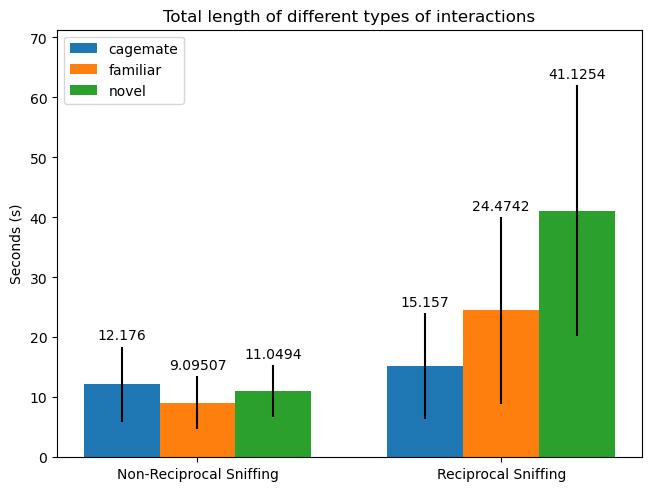

In [37]:
# Multiply the lengths of reciprocal sniffing events by 2 because
# we count the sniffing time of subject once and then add on that of the agent onece

total_length_data = {
    'cagemate': {
        "mean": (
            np.mean([sum(event) if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['cagemate']]) / 1000,
            np.mean([sum(event) * 2 if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['cagemate']]) / 1000
        ),
        "sem": (
            stats.sem([sum(event) if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['cagemate']]) / 1000,
            stats.sem([sum(event) * 2 if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['cagemate']]) / 1000
        )
    },

    'familiar': {
        "mean": (
            np.mean([sum(event) if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['familiar']]) / 1000,
            np.mean([sum(event) * 2 if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['familiar']]) / 1000
        ),
        "sem": (
            stats.sem([sum(event) if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['familiar']]) / 1000,
            stats.sem([sum(event) * 2 if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['familiar']]) / 1000
        )
    },

    'novel': {
        "mean": (
            np.mean([sum(event) if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['novel']]) / 1000,
            np.mean([sum(event) * 2 if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['novel']]) / 1000
        ),
        "sem": (
            stats.sem([sum(event) if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['novel']]) / 1000,
            stats.sem([sum(event) * 2 if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['novel']]) / 1000
        )
    }
}
plot_sniffing(total_length_data, 'Seconds (s)', 'Total length of different types of interactions')

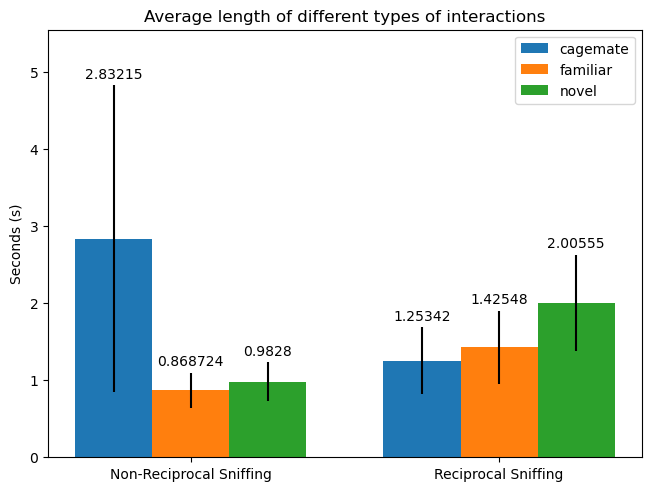

In [38]:
aver_length_data = {
    'cagemate': {
        "mean": (
            np.mean([sum(event)/len(event)/1000 if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['cagemate']]),
            np.mean([sum(event)*2/len(event)/1000 if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['cagemate']])
        ),
        "sem": (
            stats.sem([sum(event)/len(event)/1000 if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['cagemate']]),
            stats.sem([sum(event)*2/len(event)/1000 if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['cagemate']])
        )
    },

    'familiar': {
        "mean": (
            np.mean([sum(event)/len(event)/1000 if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['familiar']]),
            np.mean([sum(event)*2/len(event)/1000 if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['familiar']])
        ),
        "sem": (
            stats.sem([sum(event)/len(event)/1000 if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['familiar']]),
            stats.sem([sum(event)*2/len(event)/1000 if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['familiar']])
        )
    },

    'novel': {
        "mean": (
            np.mean([sum(event)/len(event)/1000 if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['novel']]),
            np.mean([sum(event)*2/len(event)/1000 if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['novel']])
        ),
        "sem": (
            stats.sem([sum(event)/len(event)/1000 if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['novel']]),
            stats.sem([sum(event)*2/len(event)/1000 if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['novel']])
        )
    }
}
plot_sniffing(aver_length_data, 'Seconds (s)', 'Average length of different types of interactions')

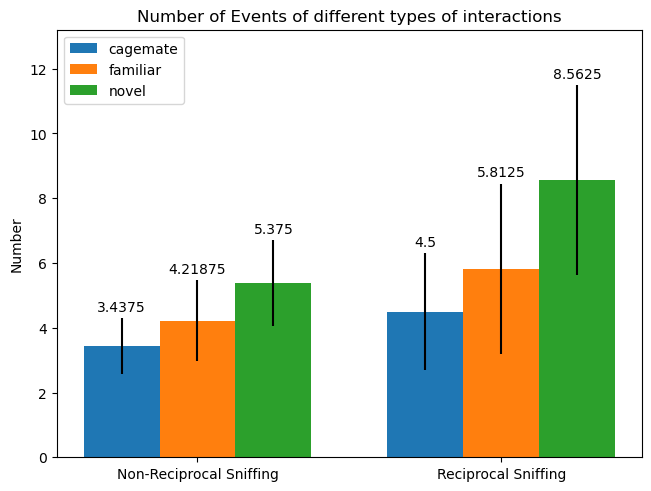

In [39]:
n_o_event = {
    'cagemate': {
        "mean": (
            np.mean([len(event) if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['cagemate']]),
            np.mean([len(event) if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['cagemate']])
        ),
        "sem": (
            stats.sem([len(event) if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['cagemate']]),
            stats.sem([len(event) if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['cagemate']])
        )
    },

    'familiar': {
        "mean": (
            np.mean([len(event) if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['familiar']]),
            np.mean([len(event) if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['familiar']])
        ),
        "sem": (
            stats.sem([len(event) if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['familiar']]),
            stats.sem([len(event) if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['familiar']])
        )
    },

    'novel': {
        "mean": (
            np.mean([len(event) if event.size != 0 else 0 
                     for event in non_reciprocal_sniffing_array['novel']]),
            np.mean([len(event) if event.size != 0 else 0 
                     for event in reciprocal_sniffing_array['novel']])
        ),
        "sem": (
            stats.sem([len(event) if event.size != 0 else 0 
                       for event in non_reciprocal_sniffing_array['novel']]),
            stats.sem([len(event) if event.size != 0 else 0 
                       for event in reciprocal_sniffing_array['novel']])
        )
    }
}

plot_sniffing(n_o_event, 'Number', 'Number of Events of different types of interactions');